# Visualizing Democracy Index Using Kohonen Self-Organizing Maps

This example is a modified notebook from the Github repository https://github.com/JustGlowing/minisom of `minisom` package for working with self-organizing maps (SOM). 

In this example we will see how to use `MiniSom` to draw some insights from the <a href="https://en.wikipedia.org/wiki/Democracy_Index">Democracy Index data</a> from Wikipedia.

First, let's load the dataset:

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale

democracy_index = pd.read_csv('democracy_index_2020.csv')

In [52]:
democracy_index.head(70)

,Unnamed: 0,rank,.mw-parser-output_.tooltip-dotted{border-bottom:1px_dotted;cursor:help}δ_rank,country,regime_type,overall_score,δ_score,elec­toral_pro­cess_and_plura­lism,func­tioning_of_govern­ment,poli­tical_partici­pation,poli­tical_cul­ture,civil_liber­ties
0,1,1,NaN,Norway,Full democracy,9.81,0.06,10.00,9.64,10.00,10.00,9.41
1,2,2,NaN,Iceland,Full democracy,9.37,0.21,10.00,8.57,8.89,10.00,9.41
2,3,3,NaN,Sweden,Full democracy,9.26,0.13,9.58,9.29,8.33,10.00,9.12
3,4,4,NaN,New Zealand,Full democracy,9.25,0.01,10.00,8.93,8.89,8.75,9.71
4,5,5,2.0,Canada,Full democracy,9.24,0.02,9.58,8.93,8.89,9.38,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...
65,67,66,NaN,Serbia,Flawed democracy,6.22,0.19,8.25,5.36,6.67,3.75,7.06
66,68,67,3.0,Paraguay,Flawed democracy,6.18,0.06,8.75,5.71,5.00,4.38,7.06
67,69,68,1.0,Sri Lanka,Flawed democracy,6.14,0.13,7.00,5.71,5.56,6.25,6.18
68,70,69,2.0,Ecuador,Flawed democracy,6.13,0.20,8.75,5.00,6.67,3.75,6.47


In [53]:
democracy_index["regime_type"].unique()

array(['Full democracy', 'Flawed democracy', 'Hybrid regime',
       'Authoritarian'], dtype=object)

As we can see, the dataset contains a set of social metrics related to the democracy level for each country. The goal is to use these metrics as features for our SOM to create a two-dimensional space where each country is mapped according to its democracy features.

Let's define a set of colors for the categories in which the countries are classified and also a country code for each country. These will become handy when we will visualize the results on the map.

In [54]:
category_color = {'Full democracy': 'darkgreen',
                  'Flawed democracy': 'limegreen',
                  'Hybrid regime': 'darkorange',
                  'Authoritarian': 'crimson'}
colors_dict = {c: category_color[dm] for c, dm in zip(democracy_index.country,
                                                      democracy_index.regime_type)}

country_codes = {'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'Angola': 'AO',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Benin': 'BJ',
 'Bhutan': 'BT',
 'Bolivia': 'BO',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Brazil': 'BR',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 'Democratic Republic of the Congo': 'CD',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Greece': 'GR',
 'Guatemala': 'GT',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Israel': 'IL',
 'Italy': 'IT',
 'Ivory Coast': 'IC',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 'Laos': 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macedonia': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Mali': 'ML',
 'Malta': 'MT',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mexico': 'MX',
 'Moldova': 'MD',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Zealand': 'NZ',
 'North Macedonia': 'NM',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'North Korea': 'KP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palestine': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Qatar': 'QA',
 'Republic of China (Taiwan)': 'TW',
 'Republic of the Congo': 'CG',
 'Romania': 'RO',
 'Russia': 'RU',
 'Rwanda': 'RW',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'South Africa': 'ZA',
 'South Korea': 'KR',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syria': 'SY',
 'Tajikistan': 'TJ',
 'Tanzania': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States': 'US',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Venezuela': 'VE',
 'Vietnam': 'VN',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW'}

We will now extract our features, scale them, and train our SOM. The exact algorithm of how the democracy features were obtained and weighted when the overall score was computed is unknown. Therefore, we will **not include the overall score in the input features**, but later, we will use the category of democracy as color in our visualization.

In [55]:
feature_names = ['elec­toral_pro­cess_and_plura­lism', 'func­tioning_of_govern­ment',
                 'poli­tical_partici­pation', 'poli­tical_cul­ture', 'civil_liber­ties']

X = democracy_index[feature_names].values
X = scale(X)

Evidently, the names of the attributes were not recognized. Let us list them

In [56]:
democracy_index.columns

Index(['Unnamed: 0', 'rank',
       '.mw-parser-output_.tooltip-dotted{border-bottom:1px_dotted;cursor:help}δ_rank',
       'country', 'regime_type', 'overall_score', 'δ_score',
       'elec­toral_pro­cess_and_plura­lism', 'func­tioning_of_govern­ment',
       'poli­tical_partici­pation', 'poli­tical_cul­ture', 'civil_liber­ties'],
      dtype='object')

They look like correct, but let us inspect their detailed representation.

In [57]:
for c in democracy_index.columns:
    print(c.__repr__())

'Unnamed: 0'
'rank'
'.mw-parser-output_.tooltip-dotted{border-bottom:1px_dotted;cursor:help}δ_rank'
'country'
'regime_type'
'overall_score'
'δ_score'
'elec\xadtoral_pro\xadcess_and_plura\xadlism'
'func\xadtioning_of_govern\xadment'
'poli\xadtical_partici\xadpation'
'poli\xadtical_cul\xadture'
'civil_liber\xadties'


The problem is in the soft hyphenation marks `\xad` that are used to split the attribute names in case of narrow columns. We can remove them.

In [58]:
democracy_index.columns = [c.replace('\xad', '') for c in democracy_index.columns]
for c in democracy_index.columns:
    print(c.__repr__())

'Unnamed: 0'
'rank'
'.mw-parser-output_.tooltip-dotted{border-bottom:1px_dotted;cursor:help}δ_rank'
'country'
'regime_type'
'overall_score'
'δ_score'
'electoral_process_and_pluralism'
'functioning_of_government'
'political_participation'
'political_culture'
'civil_liberties'


Similarly, we can clean the name of the third column.

In [59]:
democracy_index.rename(columns={'.mw-parser-output_.tooltip-dotted{border-bottom:1px_dotted;cursor:help}δ_rank': 'δ_rank'}, inplace=True)
democracy_index.columns

Index(['Unnamed: 0', 'rank', 'δ_rank', 'country', 'regime_type',
       'overall_score', 'δ_score', 'electoral_process_and_pluralism',
       'functioning_of_government', 'political_participation',
       'political_culture', 'civil_liberties'],
      dtype='object')

In [60]:
feature_names = ['electoral_process_and_pluralism', 'functioning_of_government',
                 'political_participation', 'political_culture', 'civil_liberties']

X = democracy_index[feature_names].values
X = scale(X)

In [61]:
size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

What are the parameters of the class `MiniSom`?

* What is the method `pca_weights_init()`? 
* What are the parameters of the method `train_random()`?

In [62]:
?som

Type:           MiniSom
String form:    <minisom.MiniSom object at 0x7f3795b09190>
File:           ~/uni/kopyl2024/venv/lib64/python3.12/site-packages/minisom.py
Docstring:      <no docstring>
Init docstring:
Initializes a Self Organizing Maps.

A rule of thumb to set the size of the grid for a dimensionality
reduction task is that it should contain 5*sqrt(N) neurons
where N is the number of samples in the dataset to analyze.

E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
hence a map 8-by-8 should perform well.

Parameters
----------
x : int
    x dimension of the SOM.

y : int
    y dimension of the SOM.

input_len : int
    Number of the elements of the vectors in input.

sigma : float, optional (default=1)
    Spread of the neighborhood function.

    Needs to be adequate to the dimensions of the map
    and the neighborhood function. In some cases it
    helps to set sigma as sqrt(x^2 +y^2).

learning_rate : float, optional (default=0.5)
    Initial learning rate.

    

A social map of countries
----

Here, we will plot each country representing the SOM-winning neuron in a cell. The country codes will be used instead of the full names of the countries to make the map more readable. The names of the countries will be colored according to their democracy status.

In [68]:
som.pca_weights_init(X)
som.train_random(X, 10_000, verbose=True)

/home/artem/uni/kopyl2024/venv/lib64/python3.12/site-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.16943471995888976


For the country Eswatini we do not have any country code. We will use Eswati instead.


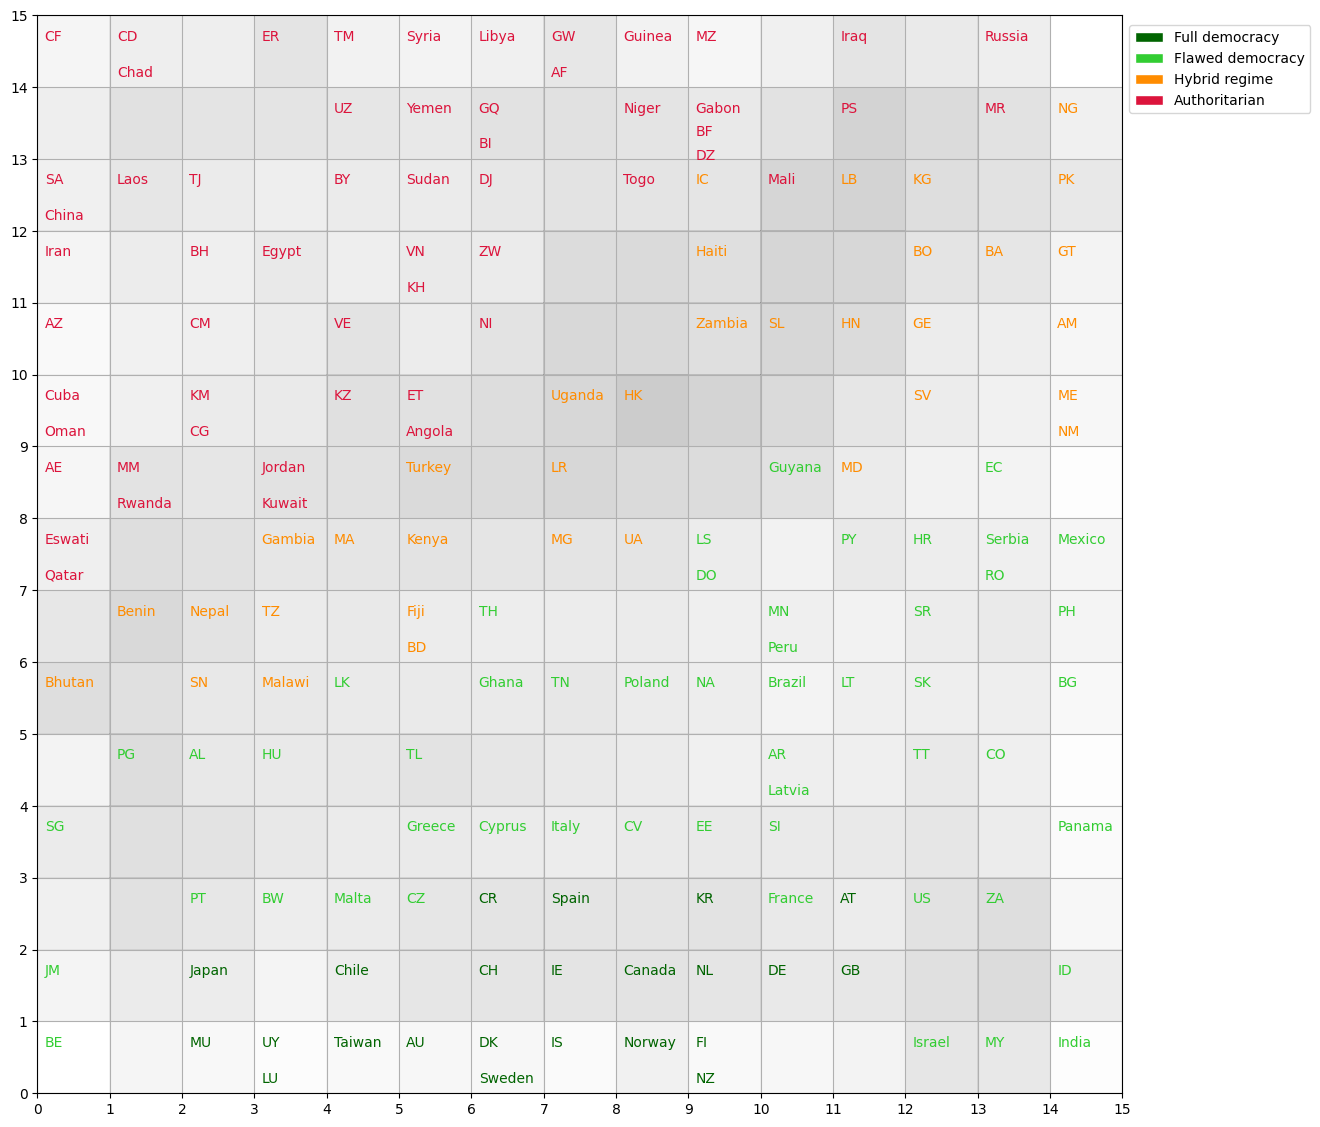

In [69]:
def shorten_country(c):
    if len(c) <= 6:
        return c
    else:
        if c in country_codes:
            return country_codes[c]
        else:
            print(f"For the country {c} we do not have any country code. We will use {c[:6]} instead.")
            return c[:6]

country_map = som.labels_map(X, democracy_index.country)

plt.figure(figsize=(14, 14))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

In [70]:
country_map

defaultdict(list,
            {(8, 0): Counter({'Norway': 1}),
             (7, 0): Counter({'Iceland': 1}),
             (6, 0): Counter({'Sweden': 1, 'Denmark': 1}),
             (9, 0): Counter({'New Zealand': 1, 'Finland': 1}),
             (8, 1): Counter({'Canada': 1}),
             (7, 1): Counter({'Ireland': 1}),
             (5, 0): Counter({'Australia': 1}),
             (9, 1): Counter({'Netherlands': 1}),
             (4, 0): Counter({'Taiwan': 1}),
             (6, 1): Counter({'Switzerland': 1}),
             (3, 0): Counter({'Luxembourg': 1, 'Uruguay': 1}),
             (10, 1): Counter({'Germany': 1}),
             (11, 1): Counter({'United Kingdom': 1}),
             (4, 1): Counter({'Chile': 1}),
             (11, 2): Counter({'Austria': 1}),
             (6, 2): Counter({'Costa Rica': 1}),
             (2, 0): Counter({'Mauritius': 1}),
             (2, 1): Counter({'Japan': 1}),
             (7, 2): Counter({'Spain': 1}),
             (9, 2): Counter({'South Korea':

Features planes
----

Here we will create a map for each feature used that reflects the magnitude of the weights associated to it for each neuron.

In [ ]:
from pprint import pprint

pprint(vars(som).keys())

dict_keys(['_random_generator', '_learning_rate', '_sigma', '_input_len', '_weights', '_activation_map', '_neigx', '_neigy', 'topology', '_xx', '_yy', '_learning_rate_decay_function', '_sigma_decay_function', 'neighborhood', '_activation_distance'])


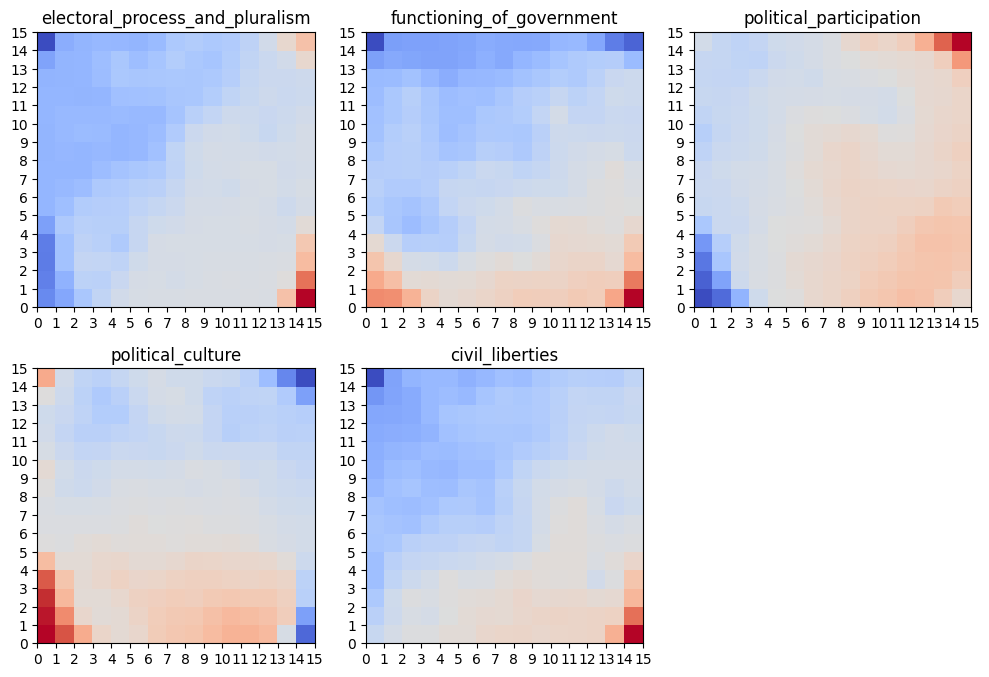

In [ ]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

The most relevant feature plane
----

In this map, we associate each neuron to the feature with the maximum weight. This segments our map in regions where specific features have high values.

/tmp/ipykernel_45246/727562299.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),


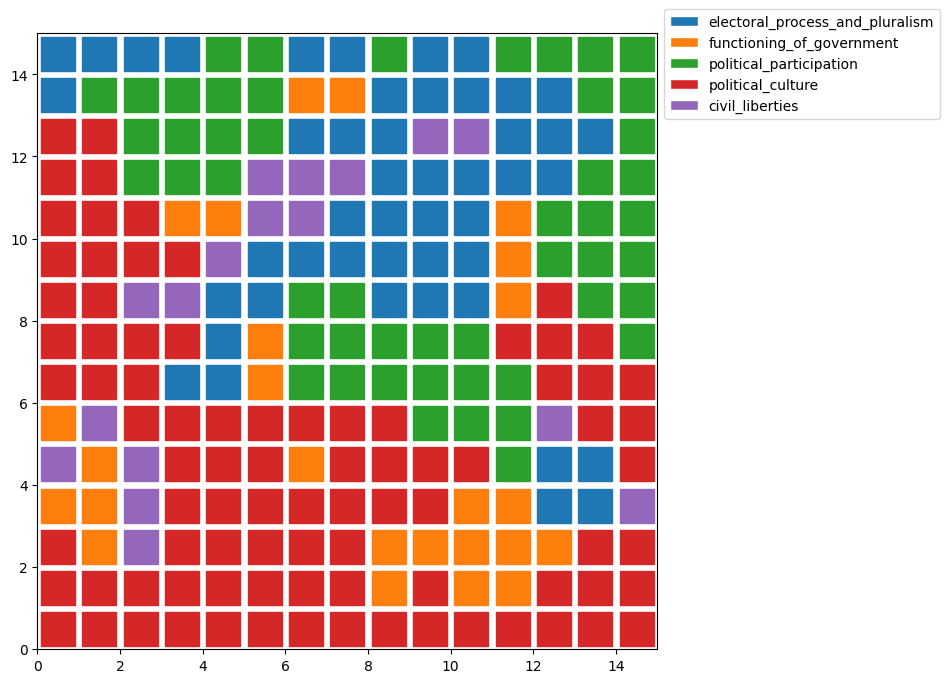

In [ ]:
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()

## Visualizing the development of democracy in a country

Select a country $C$ of your choice. Using democracy reports "Democracy Index YYYY ..." accessible from the above at <a href="https://en.wikipedia.org/wiki/Democracy_Index">Democracy Index data</a> from Wikipedia collect democracy feature values for country $C$ from several years. Map the feature vectors using the trained SOM and plot the diagram with the depicted position of country $C$ using, e.g., $CC06$, $CC08$, ..., $CC18$, where $CC$ is the country code of country $C$, as additional countries.

In [ ]:
democracy_index[democracy_index['country'].str.contains('US0|US1|United States')]

,Unnamed: 0,rank,δ_rank,country,regime_type,overall_score,δ_score,electoral_process_and_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
24,26,25,NaN,United States,Flawed democracy,7.92,0.04,9.17,6.79,8.89,6.25,8.53


In [ ]:
# in this solution there are collected democracy features for United States for years 2006, 2008, 2010, ..., 2018
# from the web pages https://en.wikipedia.org/wiki/Democracy_Index stored in the internet archive https://web.archive.org/
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US06", "Full democracy", 8.22, 0, 8.75, 7.86, 7.22, 8.75, 8.53]
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US08", "Full democracy", 8.22, 0, 8.75, 7.86, 7.22, 8.75, 8.53]
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US10", "Full democracy", 8.18, 0, 9.17, 7.86, 7.22, 8.13, 8.53]
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US12", "Full democracy", 8.11, 0, 9.17, 7.50, 7.22, 8.13, 8.53]
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US14", "Full democracy", 8.11, 0, 9.17, 7.50, 7.22, 8.13, 8.53]
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US16", "Flawed democracy", 7.98, 0, 9.17, 7.14, 7.22, 8.13, 8.24]
democracy_index.loc[len(democracy_index)] = [np.nan, np.nan, np.nan, "US18", "Flawed democracy", 7.96, 0, 9.17, 7.14, 7.78, 7.50, 8.24]


In [ ]:
democracy_index[democracy_index['country'].str.contains('US0|US1|United States')]

,Unnamed: 0,rank,δ_rank,country,regime_type,overall_score,δ_score,electoral_process_and_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
24,26.0,25.0,NaN,United States,Flawed democracy,7.92,0.04,9.17,6.79,8.89,6.25,8.53
166,NaN,NaN,NaN,US06,Full democracy,8.22,0.00,8.75,7.86,7.22,8.75,8.53
167,NaN,NaN,NaN,US08,Full democracy,8.22,0.00,8.75,7.86,7.22,8.75,8.53
168,NaN,NaN,NaN,US10,Full democracy,8.18,0.00,9.17,7.86,7.22,8.13,8.53
169,NaN,NaN,NaN,US12,Full democracy,8.11,0.00,9.17,7.50,7.22,8.13,8.53
170,NaN,NaN,NaN,US14,Full democracy,8.11,0.00,9.17,7.50,7.22,8.13,8.53
171,NaN,NaN,NaN,US16,Flawed democracy,7.98,0.00,9.17,7.14,7.22,8.13,8.24
172,NaN,NaN,NaN,US18,Flawed democracy,7.96,0.00,9.17,7.14,7.78,7.50,8.24


We must recreate the color mapping for countries. 

In [ ]:
colors_dict = {c: category_color[dm] for c, dm in zip(democracy_index.country,
                                                      democracy_index.regime_type)}

In [ ]:
feature_names = ['electoral_process_and_pluralism', 'functioning_of_government',
                 'political_participation', 'political_culture', 'civil_liberties']

X = democracy_index[feature_names].values
X = scale(X)

# we do not recompute the Kohonen Map, as we will just map new entries in the same map

# size = 15
# som = MiniSom(size, size, len(X[0]),
#               neighborhood_function='gaussian', sigma=1.5,
#               random_seed=1)

In [ ]:
# som.pca_weights_init(X)
# som.train_random(X, 2000, verbose=True)

A social map of countries
----

Here, we will plot each country in a cell representing the SOM-winning neuron. The country codes will be used instead of the full names of the countries to make the map more readable. The names of the countries will be colored according to their democracy status.

For the country Eswatini we do not have any country code. We will use Eswati instead.


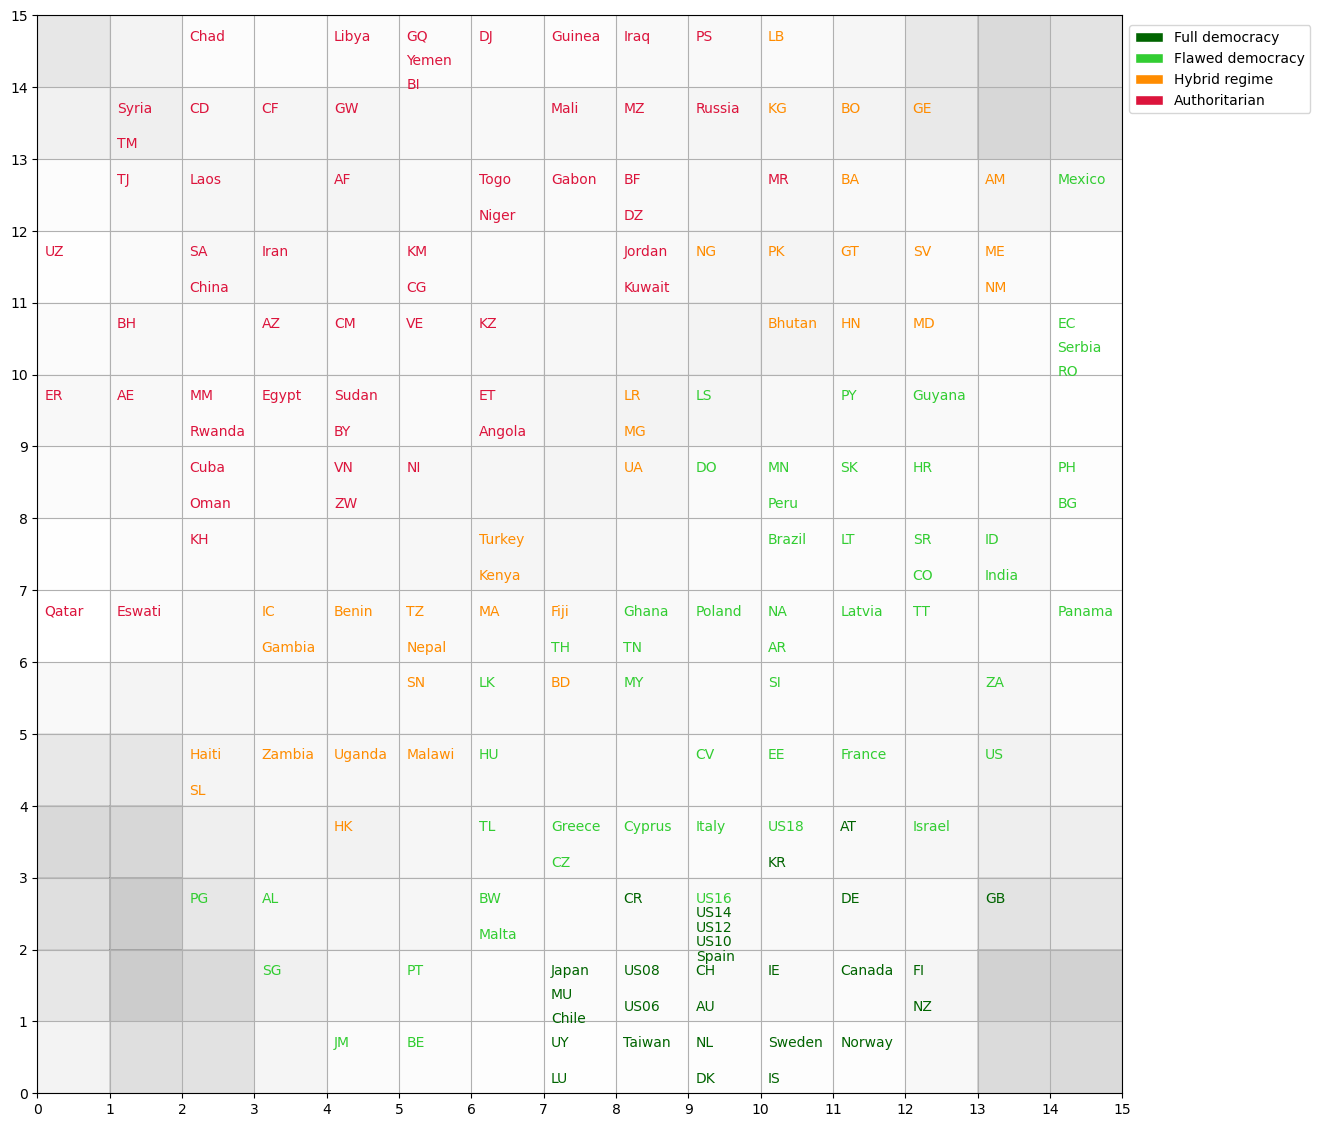

In [ ]:
def shorten_country(c):
    if len(c) <= 6:
        return c
    else:
        if c in country_codes:
            return country_codes[c]
        else:
            print(f"For the country {c} we do not have any country code. We will use {c[:6]} instead.")
            return c[:6]

country_map = som.labels_map(X, democracy_index.country)
    
plt.figure(figsize=(14, 14))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

## Getting recent data



In [ ]:
!pip install html5lib

Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [ ]:
!pip install lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 660.6 kB/s eta 0:00:06
   -- ------------------------------------- 0.2/3.8 MB 2.9 MB/s eta 0:00:02
   ------- -------------------------------- 0.7/3.8 MB 5.6 MB/s eta 0:00:01
   --------------- ------------------------ 1.4/3.8 MB 8.3 MB/s eta 0:00:01
   ------------------------- -------------- 2.5/3.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------  3.8/3.8 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 13.5 MB/s eta 0:00:00


In [ ]:
# download from wikipedia and reorganization

wikitables = pd.read_html('https://en.wikipedia.org/wiki/Democracy_Index',
                          attrs={"class":"sortable"}, header=0)
for i, t in enumerate(wikitables):
    print('Table',i,'of shape',t.shape)
    print(t)
    print('='*30)

Table 0 of shape (5, 5)
             Type of regime                                    Score  \
0            Type of regime                                    Score   
1       Full democracies[a]                     9.00–10.00 8.00–8.99   
2     Flawed democracies[b]                      7.00–7.99 6.00–6.99   
3         Hybrid regimes[c]                      5.00–5.99 4.00–4.99   
4  Authoritarian regimes[d]  3.00–3.99 2.00–2.99 1.00–1.99 0.00–0.99   

  Countries Countries.1  Proportion of world population (%)  
0    Number        (%)w  Proportion of world population (%)  
1        24       14.4%                                7.8%  
2        50       29.9%                               37.6%  
3        34       20.4%                               15.2%  
4        59       35.3%                               39.4%  
Table 1 of shape (8, 18)
                            Region  Coun­tries  2023  2022  2021  2020  2019  \
0                   Western Europe          21  8.37  8.36  8.23  

In [ ]:
democracy_index = wikitables[4]
democracy_index.columns = [c.lower().replace(' ', '_') for c in democracy_index.columns]
print(democracy_index.columns)

Index(['rank', 'δ_rank', 'country', 'regime_type', 'overall_score', 'δ_score',
       'elec­toral_pro­cess_and_plura­lism', 'func­tioning_of_govern­ment',
       'poli­tical_partici­pation', 'poli­tical_cul­ture', 'civil_liber­ties'],
      dtype='object')


In [ ]:
democracy_index.rename(columns={'overall_score': 'democracy_index'}, inplace=True)
democracy_index = democracy_index[:-1]
democracy_index.to_csv('democracy_index.csv')
print('data downloaded from Wikipedia')

data downloaded from Wikipedia


In [ ]:
democracy_index

,rank,δ_rank,country,regime_type,democracy_index,δ_score,elec­toral_pro­cess_and_plura­lism,func­tioning_of_govern­ment,poli­tical_partici­pation,poli­tical_cul­ture,civil_liber­ties
0,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies,Full democracies
1,1,NaN,Norway,Full democracy,9.81,NaN,10.00,9.64,10.00,10.00,9.41
2,2,NaN,New Zealand,Full democracy,9.61,NaN,10.00,9.29,10.00,8.75,10.00
3,3,NaN,Iceland,Full democracy,9.52,NaN,10.00,9.64,8.89,9.38,9.71
4,4,NaN,Sweden,Full democracy,9.39,NaN,9.58,9.64,8.33,10.00,9.41
...,...,...,...,...,...,...,...,...,...,...,...
165,162,1,Turkmenistan,Authoritarian regime,1.66,NaN,0.00,0.79,2.22,5.00,0.29
166,163,NaN,Syria,Authoritarian regime,1.43,NaN,0.00,0.00,2.78,4.38,0.00
167,164,2,Central African Republic,Authoritarian regime,1.18,0.17,0.00,0.00,1.67,1.88,2.35
168,165,NaN,North Korea,Authoritarian regime,1.08,NaN,0.00,2.50,1.67,1.25,0.00
